In [1]:
train = pd.read_csv("train.csv")

In [2]:
train.shape

(1458644, 11)

In [ ]:
train.columns

In [3]:
test = pd.read_csv("test.csv")

In [ ]:
test.head()

In [ ]:
train.head()

In [4]:
import datetime

In [ ]:
pickup = datetime.datetime.strptime(train.pickup_datetime[0], "%Y-%m-%d %H:%M:%S")

In [ ]:
drop = datetime.datetime.strptime(train.dropoff_datetime[0], "%Y-%m-%d %H:%M:%S")

In [ ]:
td = drop - pickup

In [ ]:
td.total_seconds()

In [ ]:
train.vendor_id.value_counts()

In [ ]:
train.store_and_fwd_flag.value_counts()

In [ ]:
sns.boxplot(train.trip_duration)

In [5]:
train_1 = train[train.trip_duration < 1500000]

In [ ]:
train_1.shape

In [ ]:
sns.boxplot(train_1.trip_duration)

In [ ]:
np.mean(train_1.trip_duration)

In [ ]:
952/60

In [ ]:
train_1[train_1.trip_duration > 80000]

In [ ]:
train_1.passenger_count.value_counts()

In [ ]:
sns.scatterplot(train_1.passenger_count, train_1.trip_duration)

In [ ]:
train_1[train_1.passenger_count > 6]

In [ ]:
test.passenger_count.value_counts()

In [6]:
manhattan = abs(train_1.dropoff_longitude - train_1.pickup_longitude) + abs(train_1.dropoff_latitude - train_1.pickup_latitude)

In [7]:
train_1["manhattan"] = manhattan

In [ ]:
train_1.tail()

In [ ]:
train_1.head()

In [ ]:
sns.scatterplot(train_1.trip_duration, train_1.manhattan)

In [ ]:
train_1.corr()

In [ ]:
model = sm.OLS.from_formula("trip_duration ~ C(vendor_id) + C(passenger_count) + manhattan",data=train_1).fit()

In [ ]:
print(model.summary())

In [ ]:
train_1.head()

In [8]:
train_1.pickup_datetime = pd.to_datetime(train_1.pickup_datetime)

In [9]:
train_1["weekday"] = train_1.pickup_datetime.apply(lambda x: x.weekday())

In [10]:
train_1["pickup_hour"] = train_1.pickup_datetime.apply(lambda x: x.hour)

In [ ]:
train_1.head()

In [ ]:
sns.distplot(np.log1p(train_1.trip_duration))

In [10]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

In [ ]:
plt.hist(np.log1p(train_1.manhattan))
plt.show()

In [ ]:
plt.hist(np.log1p(train_1.manhattan*1000))
plt.show()

In [ ]:
from sklearn.preprocessing import normalize

In [11]:
a = (train_1.pickup_longitude > -73.8873)

In [12]:
train_1["center"] = [0 if i else 1 for i in a]

In [ ]:
train_1.head()

In [ ]:
train_1["center"].value_counts()

In [ ]:
model = sm.OLS.from_formula("np.log1p(trip_duration) ~ scale(I(np.log1p(manhattan*1000))) + C(weekday) + C(pickup_hour) + C(center) + 0", data=train_1)

In [13]:
model = sm.OLS.from_formula("np.log1p(trip_duration) ~ scale(I(np.log1p(manhattan*1000)))", data=train_1)

In [ ]:
model.exog[:, 1]

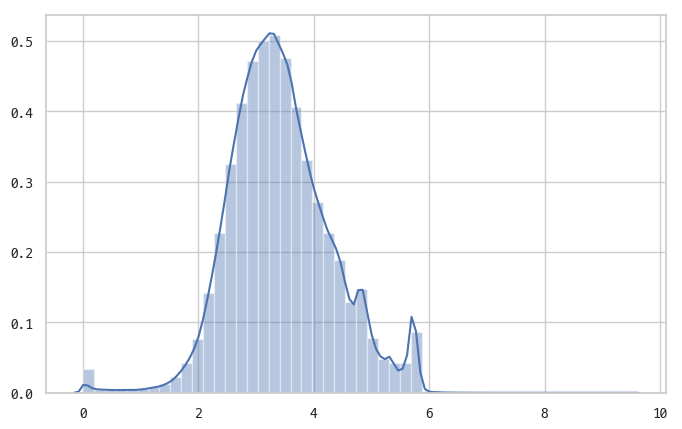

In [17]:
sns.distplot(np.log1p(manhattan*1000))

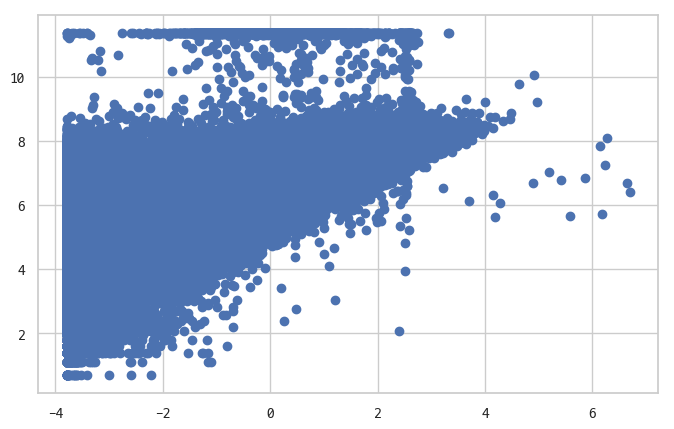

In [14]:
plt.scatter(model.exog[:, 1], model.endog)

In [15]:
model2 = sm.OLS.from_formula("np.log1p(trip_duration) ~ scale(I(np.log1p(manhattan)))", data=train_1)

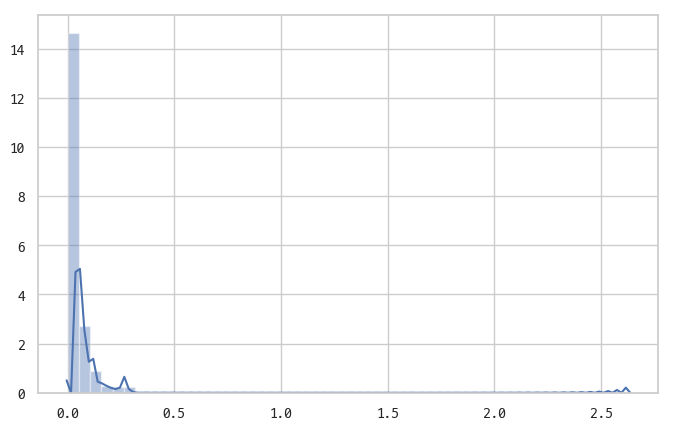

In [18]:
sns.distplot(np.log1p(manhattan))

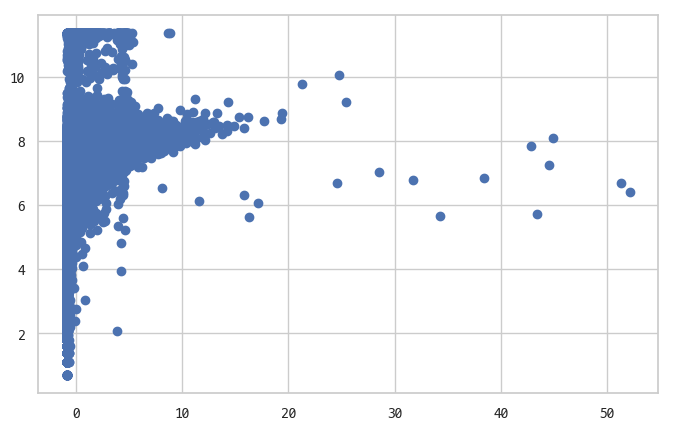

In [16]:
plt.scatter(model2.exog[:, 1], model2.endog)

In [ ]:
result = model.fit()

In [ ]:
print(result.summary())

In [ ]:
train_1[["center", "trip_duration"]].corr()

In [ ]:
np.log1p(train_1[train_1.center == 0].manhattan).mean()

In [ ]:
np.log1p(train_1[train_1.center == 1].manhattan).mean()

In [ ]:
dfx = train_1[["vendor_id", "passenger_count", "manhattan", "weekday", "pickup_hour", "center"]]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfx.values, i) for i in range(dfx.shape[1])]
vif["features"] = dfx.columns
vif

In [ ]:
dfx[["manhattan", "center"]].corr()

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()
pred = result_boston.predict(dfX)

influence_boston = result_boston.get_influence()
cooks_d2, pvals = influence_boston.cooks_distance
fox_cr = 4 / (len(y) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]

# MEDV = 50 제거
idx = np.hstack([idx, np.where(boston.target == 50)[0]])

ax = plt.subplot()
plt.scatter(dfy, pred)
plt.scatter(dfy.MEDV[idx], pred[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx,
                    list(zip(dfy.MEDV[idx], pred[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.title("보스턴 집값 데이터에서 아웃라이어")
plt.show()

NameError: name 'y' is not defined